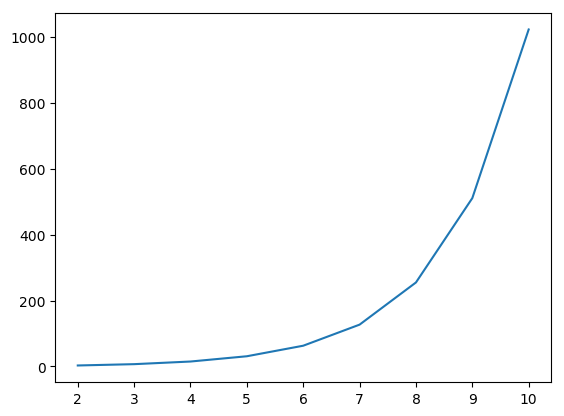

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.reset_defaults()
from scipy import special

plt.plot(range(2,11),[sum(special.binom(k,1+j) for j in range(k)) for k in range(2,11)])

## make_classification

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from secoc import estimator; reload(estimator)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_classes=3, n_clusters_per_class=1, n_samples=200, n_features=20)

In [6]:
train_index, test_index = next(StratifiedShuffleSplit(n_splits=1, test_size=100).split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
# X_train_small = X_train
# y_train_small = y_tr

In [22]:
reload(estimator)
from sklearn.tree import DecisionTreeClassifier
est = estimator.SlidingECOC(
    LogisticRegression(), n_estimators_window=1000, window_size=5,
    oob_score=True, code_size=2000, single_seed_features=True, circular_features=True, random_state=None,
    n_estimators=None, stride=2, max_features=.9, max_samples=1.,
    bootstrap_features=True, bootstrap=True, verbose=1, n_jobs=-1).fit(
        X_train, y_train)
encoding = est.encode(X_train)

You are about to generate 1000 estimators for 10 windows, for a total of 10000 estimators.


[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    5.2s remaining:   36.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   10.1s finished


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

code_range = map(int, np.linspace(10,10000, 1000))
tr_score, ts_score = [], []
for code_size in code_range:
    y_pred = est.predict(X_test, classifier=KNeighborsClassifier(metric='hamming'), code_size=code_size)
    ts_score.append(accuracy_score(y_test, y_pred))
    y_pred = est.predict(X_train, classifier=KNeighborsClassifier(metric='hamming'), code_size=code_size)
    tr_score.append(accuracy_score(y_train, y_pred))

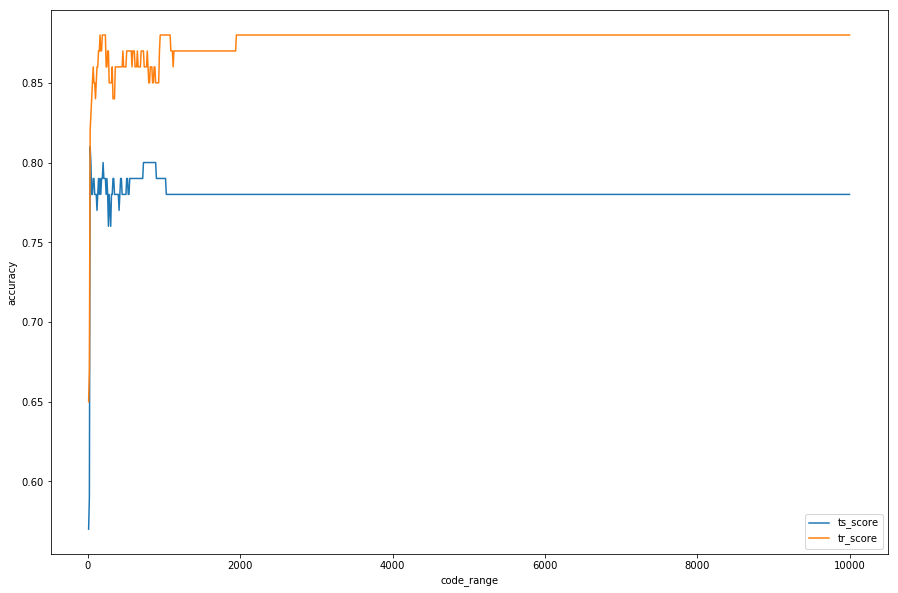

In [50]:
plt.figure(figsize=(15,10))
plt.plot(code_range, ts_score, label="ts_score")
plt.plot(code_range, tr_score, label="tr_score")

plt.xlabel("code_range")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [44]:
accuracy_score(y_test, y_pred)

0.81000000000000005

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=850).fit(X_train_small, y_train_small)

rfc.score(X_test, np.where(y_test)[1])

0.94479999999999997

In [105]:
from sklearn.manifold import TSNE
def visualise(X, y, title=''):
    tr = TSNE(n_components=2).fit_transform(X)
    for i in np.unique(y):
        plt.plot(tr[y == i,0],tr[y == i,1], 'o', label=i)
        
    plt.legend(bbox_to_anchor=(0., -.252, 1., .102), loc='lower center',
           ncol=5, mode="expand", borderaxespad=0.)
    plt.title(title)
    plt.show()

In [106]:
encoding.shape

(60000, 1700)

In [ ]:
visualise(encoding, y_train_small, "encoding")

In [ ]:
visualise(X_train_small, y_train_small, "CNN features")

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def visualise_lda(X, y):
    tr = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
    for i in np.unique(y):
        plt.plot(tr[y == i,0],tr[y == i,1], 'o', label=i)
        
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)
    plt.show()

/home/fede/miniconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


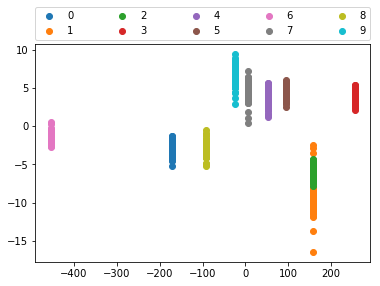

In [48]:
visualise_lda(X_train_small, y_train_small)

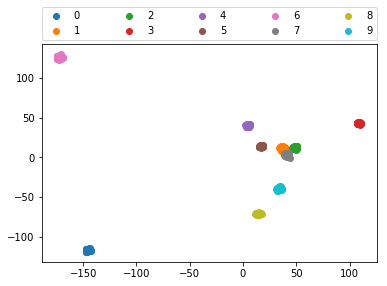

In [49]:
visualise_lda(encoding, y_train_small)